# `Importing Libraries`

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

#Import for scaling of variables
from sklearn.preprocessing import StandardScaler

#Imports for Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
filterwarnings('ignore')

#Imports for KMeans Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

#Imports for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# `1. Data Inspection and Data Cleaning.`

In [2]:
#reading the dataset
ngo=pd.read_csv('Country-data.csv')
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#reading the data dictionary
data_dict=pd.read_csv('data-dictionary+.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [4]:
#shape of the dataset
ngo.shape

(167, 10)

In [5]:
#data-types of the variables
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


All other variables in the dataframe are either of int or float type other than 'country'.

In [6]:
#Checking missing values
ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values in the dataframe.

In [7]:
#Columns of the dataframe
ngo_columns=ngo.columns
ngo_columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
#Looking at the basic stats of the dataframe.
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
#Searching for duplicate values of country
ngo['country'].unique().shape

(167,)

No country is repeated in the column country.

## `1.1 Outliers`

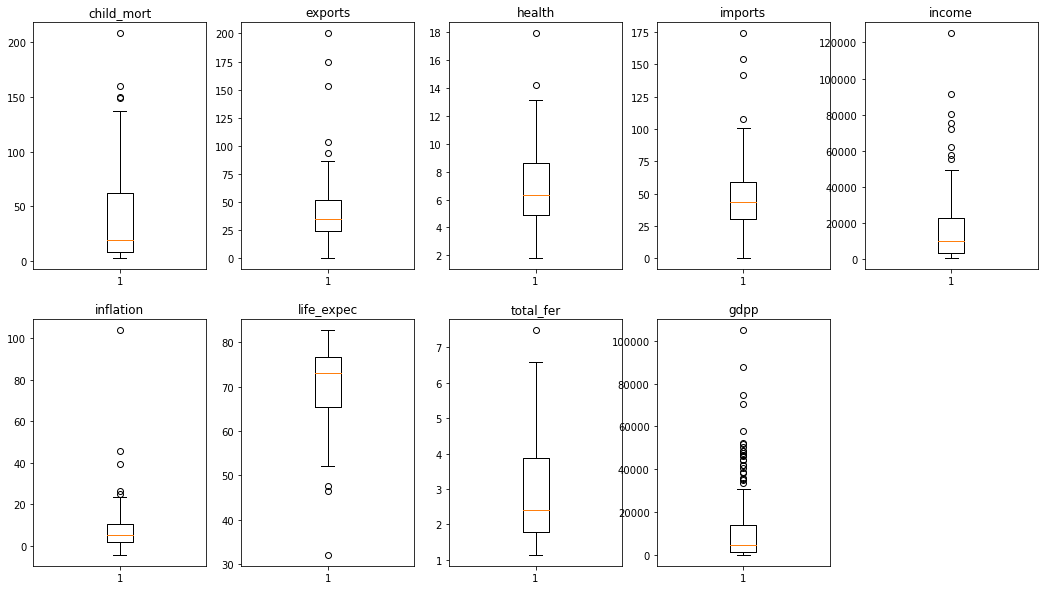

In [10]:
#Visualizing if any outliers using boxplots.
plt.figure(figsize=(18,10))
j=1
for i in ngo_columns.drop('country'):
    plt.subplot(2,5,j)
    plt.boxplot(ngo[i])
    plt.title(i)
    j+=1
plt.show()

There are visible outliers in gdpp, income, exports and inflation along with very few outliers in other variables.

In [11]:
#Quantifying outliers: q1, q3, IQRs and number of outliers for all variables
def num_outliers(dataframe):
    q1=dataframe.quantile(0.25)
    q3=dataframe.quantile(0.75)
    iqr=q3-q1
    outlier=((dataframe < (q1 - 1.5 * iqr)) | (dataframe > (q3 + 1.5 * iqr))).sum()
    print('q1')
    print(q1)
    print('\nq3')
    print(q3)
    print('\nIQR ')
    print(iqr)
    print('\nNumber of outliers')
    return outlier
outlier=num_outliers(ngo[ngo_columns.drop('country')])
outlier

q1
child_mort       8.250
exports         23.800
health           4.920
imports         30.200
income        3355.000
inflation        1.810
life_expec      65.300
total_fer        1.795
gdpp          1330.000
Name: 0.25, dtype: float64

q3
child_mort       62.10
exports          51.35
health            8.60
imports          58.75
income        22800.00
inflation        10.75
life_expec       76.80
total_fer         3.88
gdpp          14050.00
Name: 0.75, dtype: float64

IQR 
child_mort       53.850
exports          27.550
health            3.680
imports          28.550
income        19445.000
inflation         8.940
life_expec       11.500
total_fer         2.085
gdpp          12720.000
dtype: float64

Number of outliers


child_mort     4
exports        5
health         2
imports        4
income         8
inflation      5
life_expec     3
total_fer      1
gdpp          25
dtype: int64

#### Finding countries which are outliers for all respective variables:

In [12]:
print('Child Mortality')
ngo[(ngo['child_mort'] < 8.25-(1.5 * 53.850)) | (ngo['child_mort'] > 62.10+(1.5 * 53.850))]['country']

Child Mortality


31     Central African Republic
32                         Chad
66                        Haiti
132                Sierra Leone
Name: country, dtype: object

In [13]:
print('exports')
ngo[(ngo['exports'] < 23.800-(1.5 * 27.550)) | (ngo['exports'] > 51.35+(1.5 * 27.550))]['country']

exports


73        Ireland
91     Luxembourg
98          Malta
131    Seychelles
133     Singapore
Name: country, dtype: object

In [14]:
print('health')
ngo[(ngo['health'] < 4.920-(1.5 * 3.680)) | (ngo['health'] > 8.60+(1.5 * 3.680))]['country']

health


101    Micronesia, Fed. Sts.
159            United States
Name: country, dtype: object

In [15]:
print('imports')
ngo[(ngo['imports'] < 30.200-(1.5 * 28.550)) | (ngo['imports'] > 58.750+(1.5 * 28.550))]['country']

imports


91     Luxembourg
98          Malta
131    Seychelles
133     Singapore
Name: country, dtype: object

In [16]:
print('income')
ngo[(ngo['income'] < 3355.000-(1.5 * 19445.000)) | (ngo['income'] > 22800.00+(1.5 * 19445.000))]['country']

income


23                   Brunei
82                   Kuwait
91               Luxembourg
114                  Norway
123                   Qatar
133               Singapore
145             Switzerland
157    United Arab Emirates
Name: country, dtype: object

In [17]:
print('inflation')
ngo[(ngo['inflation'] < 1.810-(1.5 * 8.940)) | (ngo['inflation'] > 10.75+(1.5 * 8.940))]['country']

inflation


49     Equatorial Guinea
103             Mongolia
113              Nigeria
149          Timor-Leste
163            Venezuela
Name: country, dtype: object

In [18]:
print('life expectancy')
ngo[(ngo['life_expec'] < 65.300-(1.5 * 11.500)) | (ngo['life_expec'] > 76.80+(1.5 * 11.500))]['country']

life expectancy


31    Central African Republic
66                       Haiti
87                     Lesotho
Name: country, dtype: object

In [19]:
print('total fertility')
ngo[(ngo['total_fer'] < 1.7955-(1.5 * 2.085)) | (ngo['total_fer'] > 3.88+(1.5 * 2.085))]['country']

total fertility


112    Niger
Name: country, dtype: object

In [20]:
print('gdpp')
ngo[(ngo['gdpp'] < 1330.000-(1.5 * 12720.000)) | (ngo['gdpp'] > 14050.00+(1.5 * 12720.000))]['country']

gdpp


7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
68                  Iceland
73                  Ireland
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
133               Singapore
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

#### `Since we have only 167 rows where each row signifies a country, not deleting or treating them for analysis.`

# `2. Exploratory data analysis:`

### `2.1 Univariate Analysis`

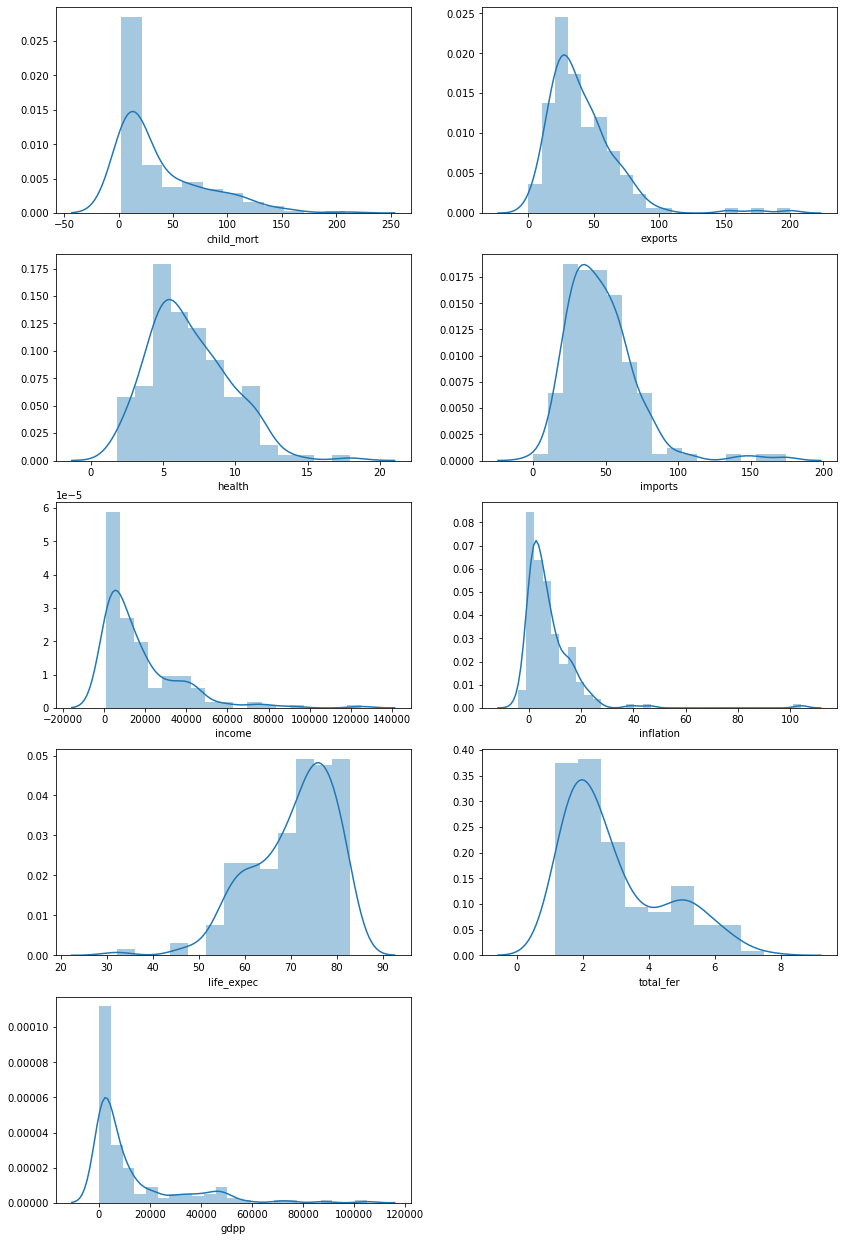

In [21]:
# Plotting a dist-plot for all variables to understand their distribution.
j=1
plt.figure(figsize=(14,22))
for i in ngo[ngo_columns.drop('country')]:
    plt.subplot(5,2,j)
    sns.distplot(ngo[i])
    j=j+1
plt.show()

In [22]:
#Function to determine Country with maximum and minimum values for different columns
def max_min_col(col):
    dict1={}
    max_country=ngo[ngo[col]==max(ngo[col])].country
    dict1[max_country.iloc[0]]=max(ngo[col])
    min_country=ngo[ngo[col]==min(ngo[col])].country
    dict1[min_country.iloc[0]]=min(ngo[col])
    return dict1

In [23]:
for i in ngo[ngo_columns.drop('country')]:
    my_dict=max_min_col(i)
    print(i, my_dict)

child_mort {'Haiti': 208.0, 'Iceland': 2.6}
exports {'Singapore': 200.0, 'Myanmar': 0.109}
health {'United States': 17.9, 'Qatar': 1.81}
imports {'Singapore': 174.0, 'Myanmar': 0.0659}
income {'Qatar': 125000, 'Congo, Dem. Rep.': 609}
inflation {'Nigeria': 104.0, 'Seychelles': -4.21}
life_expec {'Japan': 82.8, 'Haiti': 32.1}
total_fer {'Niger': 7.49, 'Singapore': 1.15}
gdpp {'Luxembourg': 105000, 'Burundi': 231}


#### `Based on the distribution plots, boxplots and describe function applied to the variables:`
1. On an average 19 out of 1000 children die before the age of 5. The maximum mortality rate in a country is 208-Haiti and the minimum is Iceland-2.6. Haiti is in pretty bad condition as far as child mortality is considered.
2. On an average exports is 35% of the GDP per capita comprises of exports accross the world. The maximum % is Singapore- 200 which is clearly an outlier(Some other sector must be nullifying this 200% export % in gdp per capita) and the minimum is Myanmar-0.109.
3. On an average Health spending is only 6.32% in gdp per capita accross the world. The maximum % is United States-17.9% and the minimum is Qatar- 1.81%. But as per prior knowledge Qatar is an effluent country.
4. On an average imports contribute only 43% of the gdp per capita accross the world. The maximum % is Singapore- 174 which is clearly an outlier(Some other sector must be nullifying this 174% import % in gdp per capita) and the minimum is Myanmar-0.0659.
5. On an average the net income of a person accross the world is 9960 units. The maximum net income of a person is in Qatar- 125000 which says much about people's financial well being in Qatar and minimum is in Congo- 609 whuch is much less than the 25th percentile. People in Congo Demoocratic Republic are financially miserable.
6. On an average the inflation accross the world is 5.39% accross the world. The maximum inflation is in Nigeria: 104% which is troublesome for them and minimum inflation is in Seychelles: -4.21%.
7. The life expectancy average accross the world is 73.10. The minimum life expectancy is in Haiti-32.1 which is very less compared to the average life expectancy(Haiti is also in the worst situation as fara as Child Mortality is considered) and the maximum life expectancy is in Japan- 82.8
8. The average number of birth given by women is 2. Nigeria has the maximum number of average births given by a woman: 7 which us clearly an outlier and Singapore is the least 1.15~1
9. The average gdpp accross the world is 4660. The maximum gdpp is observed in Luxembourg: 105000 which is clearly an outlier and explains the development there and Burundi has the least 231.

### `2.2 Bivariate and multivariate Analysis:`

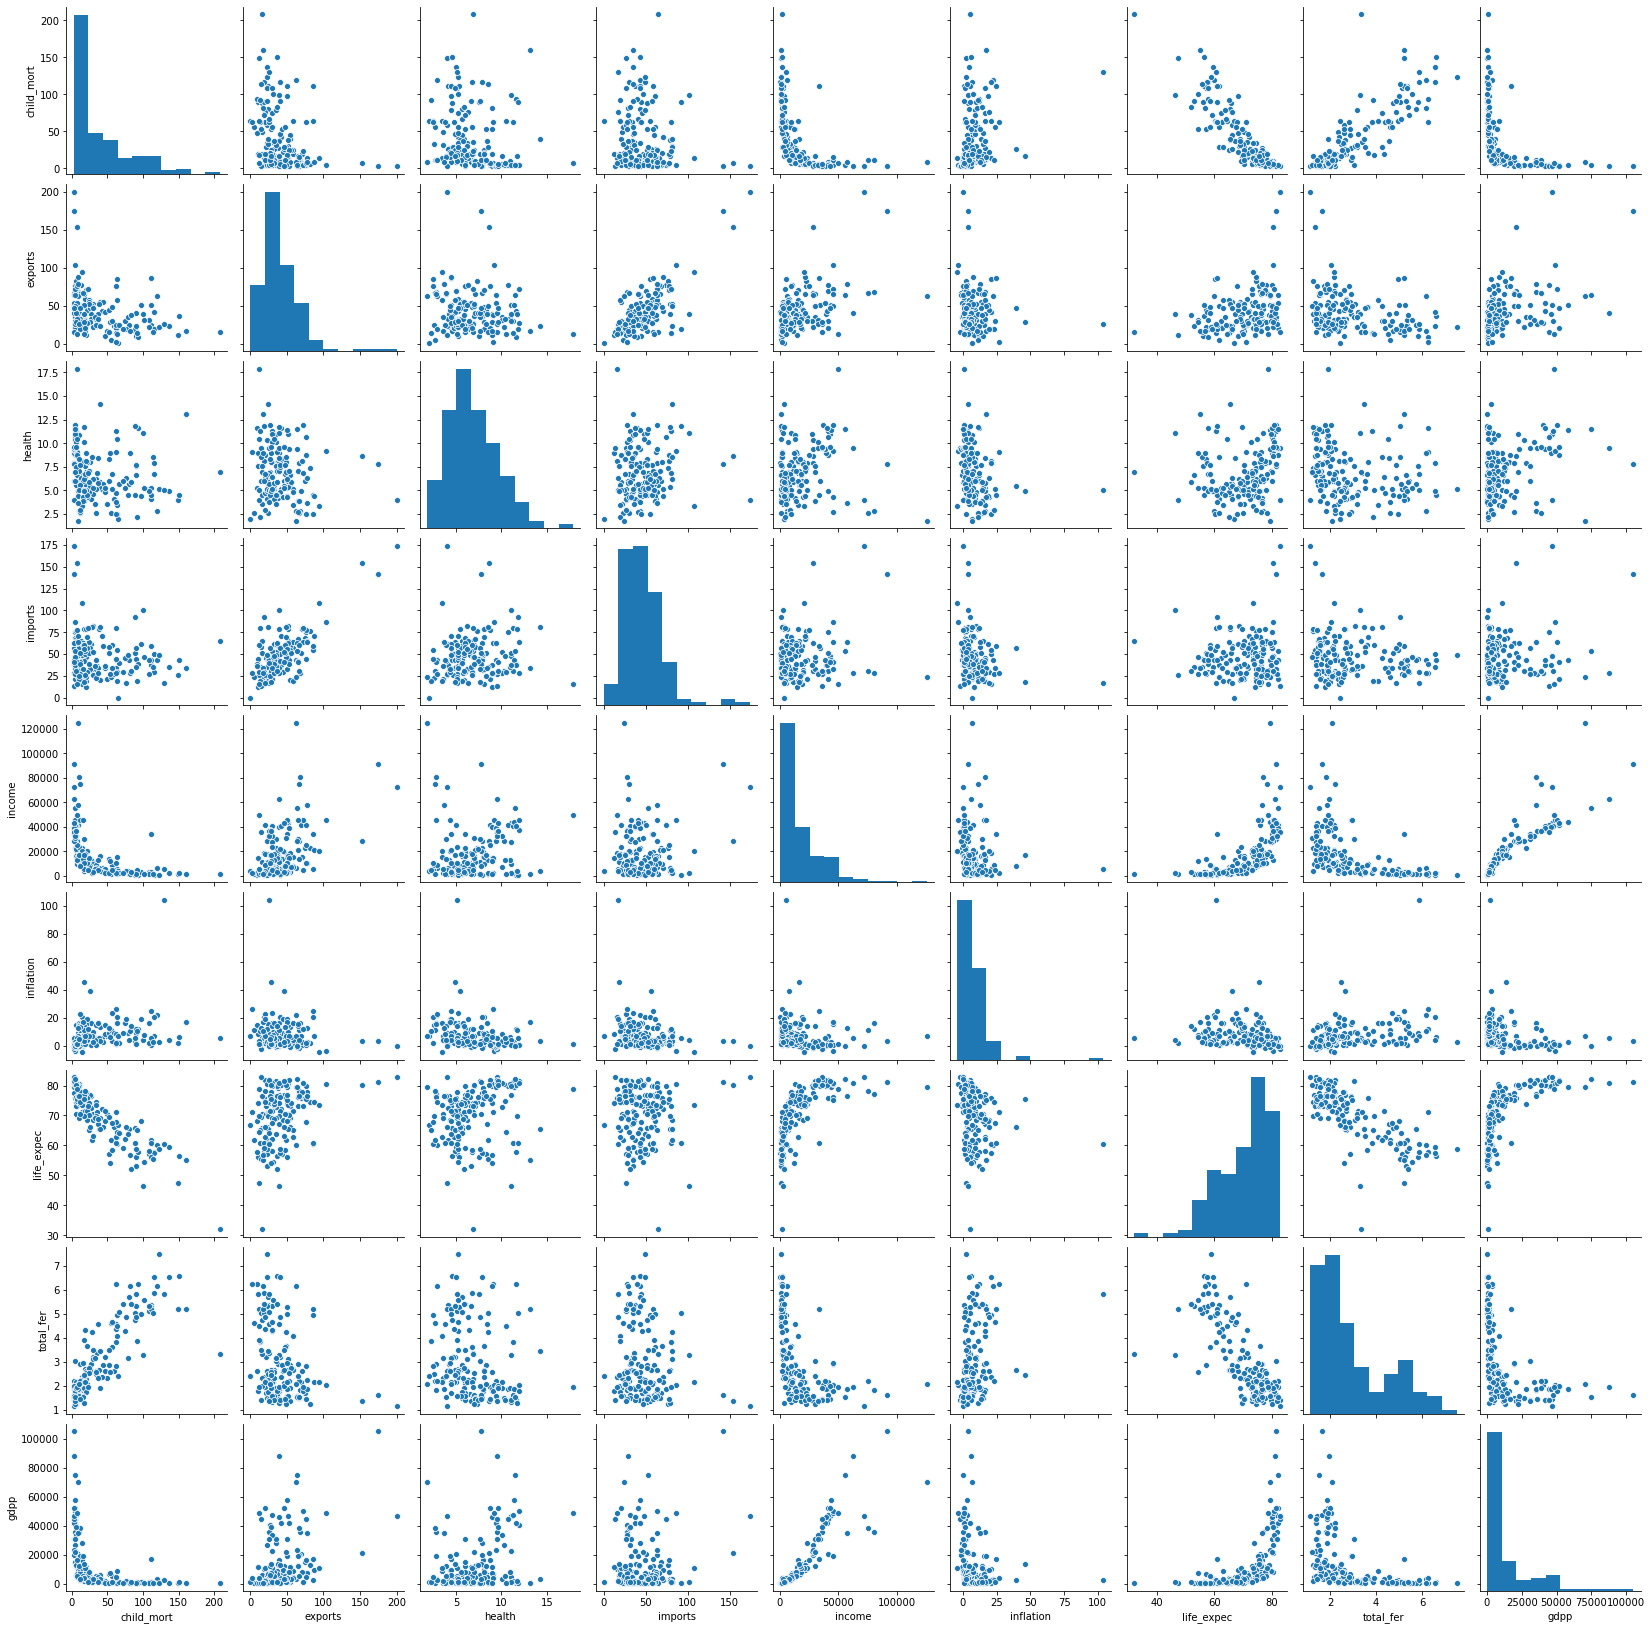

In [24]:
# Visualizing the pairplot for the entire dataframe to understand the relationship amongst them:
sns.pairplot(ngo[ngo_columns.drop('country')])
plt.show()

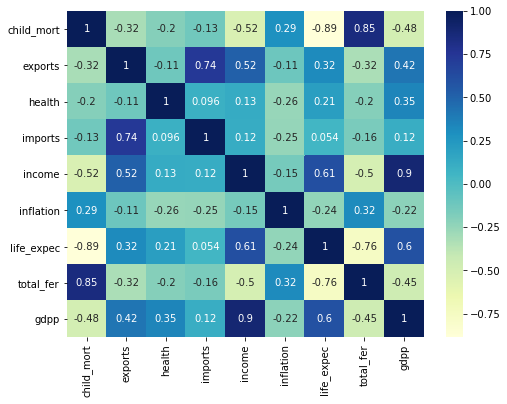

In [25]:
#Calculating the correlation matrix.
correlation_matrix=ngo[ngo_columns.drop('country')].corr()

#Plotting the correlation matrix in a heatmap.
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True,cmap="YlGnBu")
plt.show()

In [26]:
#Calculating the variance inflation factor and sort according to the most multi collinear variables to see the relationship of
#a variable along with all other variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=ngo_columns.drop('country')
vif['VIF']=[variance_inflation_factor(ngo[ngo_columns.drop('country')].values, i) for i in range(ngo[ngo_columns.drop('country')].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,life_expec,21.92
7,total_fer,17.67
3,imports,17.28
1,exports,16.08
4,income,13.41
2,health,12.42
8,gdpp,10.30
0,child_mort,8.08
5,inflation,1.99


#### `Based on the pairplot, correlation matrix and variance inflation factor:`
- Life expectancy and total fertility are the most collinear variables with all other variables which in a way is indicative of country's situation.
#### `Other most important relations are:`
1. Exports and imports are hughly related to each other
2. A person's income and country's gdpp is highly related.
3. Life expectancy is inversely related to child mortality and total fertility

# 3. Data Preparation.

In [27]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 3.1 Hopkins Statistics- Hypothesis Testing.

**Null Hypothesis:** Dataset is uniformly distributed. Hence no meaningful clusters. Average H <=0.85

**Alternate Hypotheis:** dataset is not uniformly distributed. Hence It contains meaningful clusters. Average H > 0.85

where H is Hopkins Statisctic value.

In [28]:
# Function to calculate Hopkins statistic.
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
# Calculating Hopkins statistics for 10 iterations
for i in range(0,10):
    print(hopkins(ngo[ngo_columns.drop('country')]))

0.9772008299316194
0.9312307543145422
0.9708057647132904
0.962891031645081
0.954547269016574
0.9352458134424535
0.9802057943468155
0.8572373657629837
0.8601051256130501
0.961822682841757


The average value of H > 0.85
#### `We reject the null-hypothesis. The dataset contains meaningful clusters.`


### 3.2 Rescaling the variables.

In [30]:
#Since outliers are spread in our data, using Standard Scaler instead of MinMaxScaler for scaling the variables to have a spread of outliers 
#in our scaled data as well.

scaler=StandardScaler()
ngo_model=scaler.fit_transform(ngo[ngo_columns.drop('country')])
ngo_model=pd.DataFrame(ngo_model)
ngo_model.columns=ngo_columns.drop('country')
ngo_model.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### `The data is prepared and based on our hypothesis testing is suitable for clustering.`


# `4. Model`

### `4.1 KMeans Clustering.`

### `4.1.1 Finding the optimal value of K using Elbow Method(ssd):`

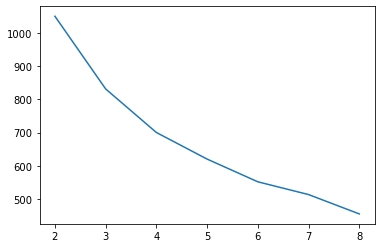

In [31]:
#Finding the ssd for clusters iterating over number of clusters from 2 to 8.
num_clusters=[2,3,4,5,6,7,8]
ssd=[]
for i in num_clusters:
    kmeans=KMeans(n_clusters=i, init='k-means++', n_init=20)
    kmeans.fit(ngo_model)
    ssd.append(kmeans.inertia_)

#Plotting the graph of ssd- The elbow curve
plt.plot([2,3,4,5,6,7,8], ssd)
plt.show()

#### Based on elbow method, we can conclude that the optimal number of K must be 3 or 4 based on the optimal cluster patterns.

### `4.1.2 Silhouette score and Silhouette coefficient graphs:`

In [32]:
#Function to Calculate Silhouette score and plot a graph for Silhouette coefficient for every cluster for 
#different number of clusters

def Silhouette_Analysis(df):

    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=20)
        cluster_labels = clusterer.fit_predict(df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(df, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df[:, 0], df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    a= 'Choose the optimum value of K'
    return a

For n_clusters = 2 The average silhouette_score is : 0.2873566892140671
For n_clusters = 3 The average silhouette_score is : 0.28329575683463126
For n_clusters = 4 The average silhouette_score is : 0.301375962376881
For n_clusters = 5 The average silhouette_score is : 0.22327899566511256
For n_clusters = 6 The average silhouette_score is : 0.22412825679578482
For n_clusters = 7 The average silhouette_score is : 0.25049570233679747
For n_clusters = 8 The average silhouette_score is : 0.23627177323933837


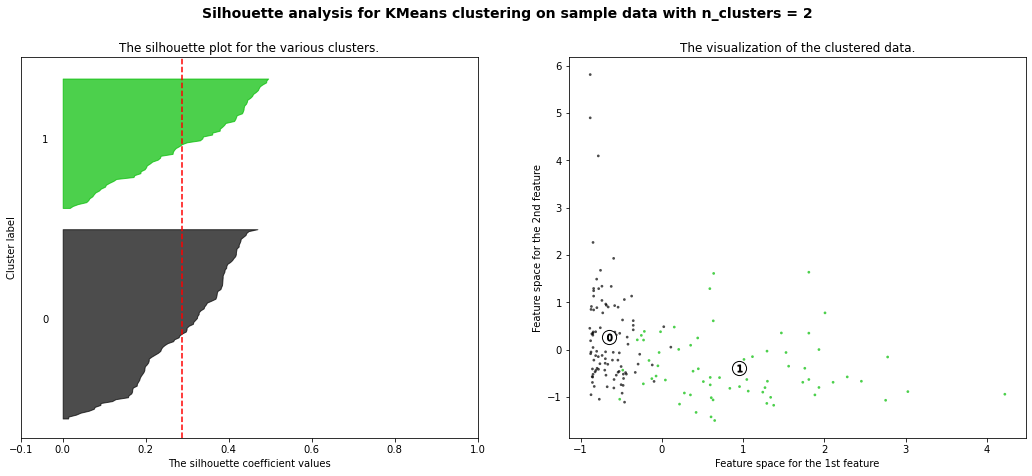

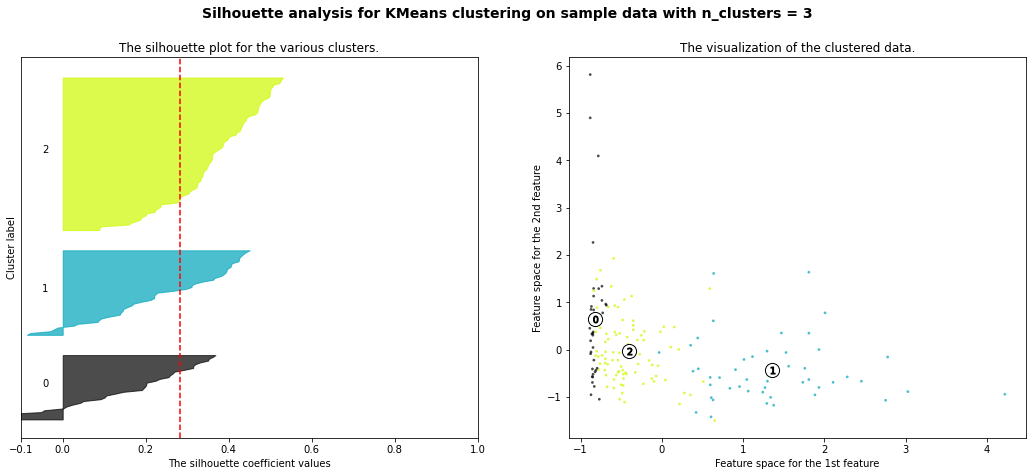

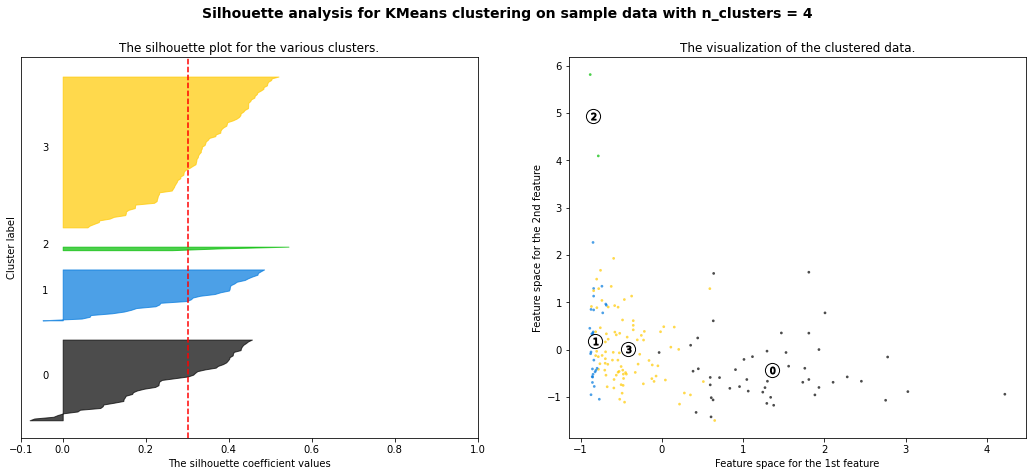

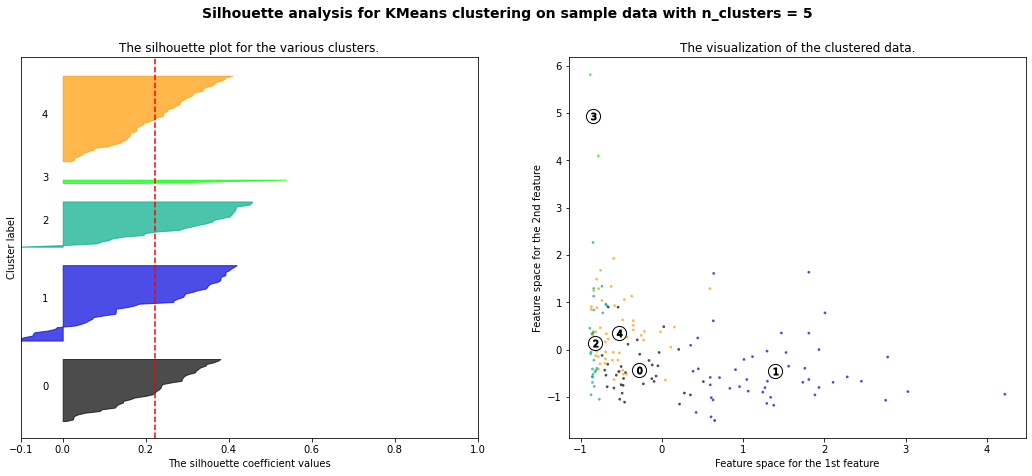

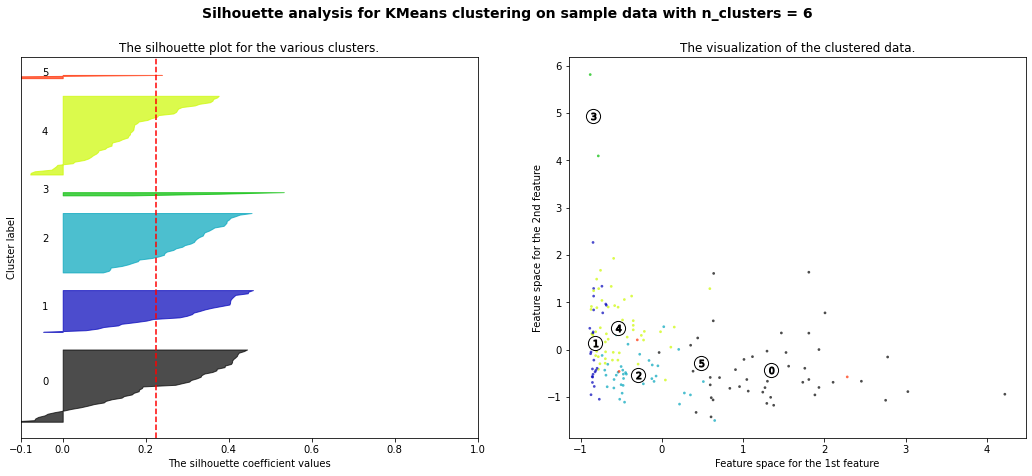

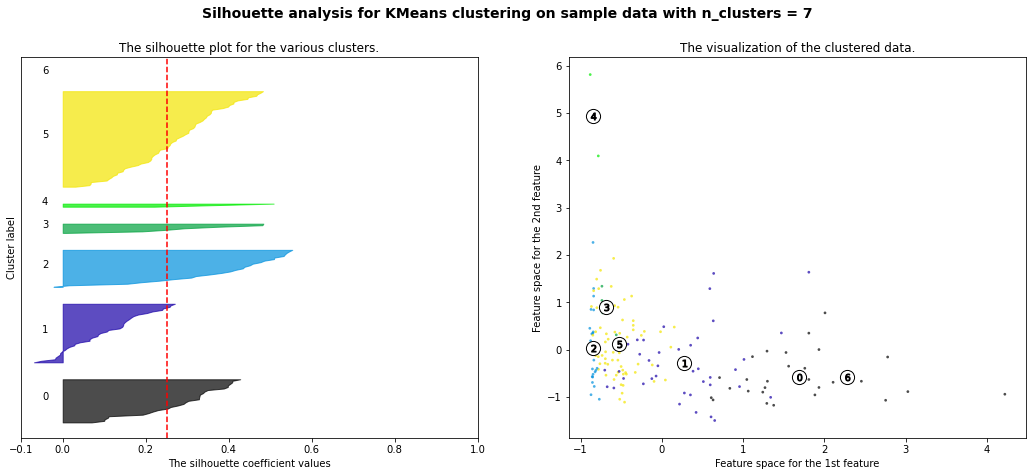

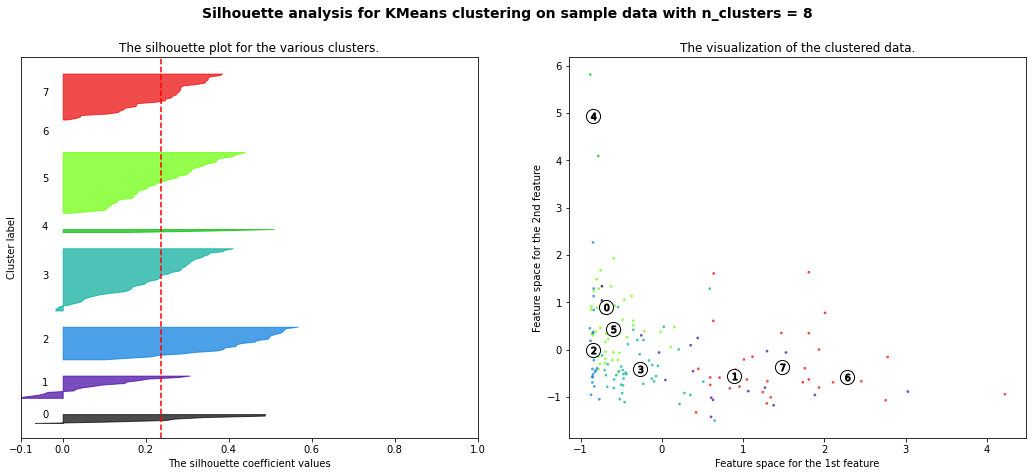

'Choose the optimum value of K'

In [33]:
#Executing the Silhouette_Analysis function for our scaled dataframe.
Silhouette_Analysis(ngo_model.values)

`From the silhouette score and silhouette coefficient graphs, we can infer that the silhouette score rises from K=3 to 4 but the graph of silhouette coefficient goes negative for both k=3 and k=4. Hence will consider both k=3 and k=4 and analyse cluster profiles for both.`

### `4.1.3 KMeans Modelling`

### `(a) Number of Clusters(k)=3`

In [34]:
#Creating an object for KMeans and fitting the model
kmeans=KMeans(n_clusters=3, init='k-means++', n_init=20)
kmeans.fit(ngo_model)

#Labels for the model having cluster-ids
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [35]:
#Adding the cluster ids to the dataframe.
ngo['KMeans_Cluster']=kmeans.labels_
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [37]:
#Number of datapoints in every cluster.
ngo.KMeans_Cluster.value_counts()

2    84
1    47
0    36
Name: KMeans_Cluster, dtype: int64

#### `Analyzing the clusters`

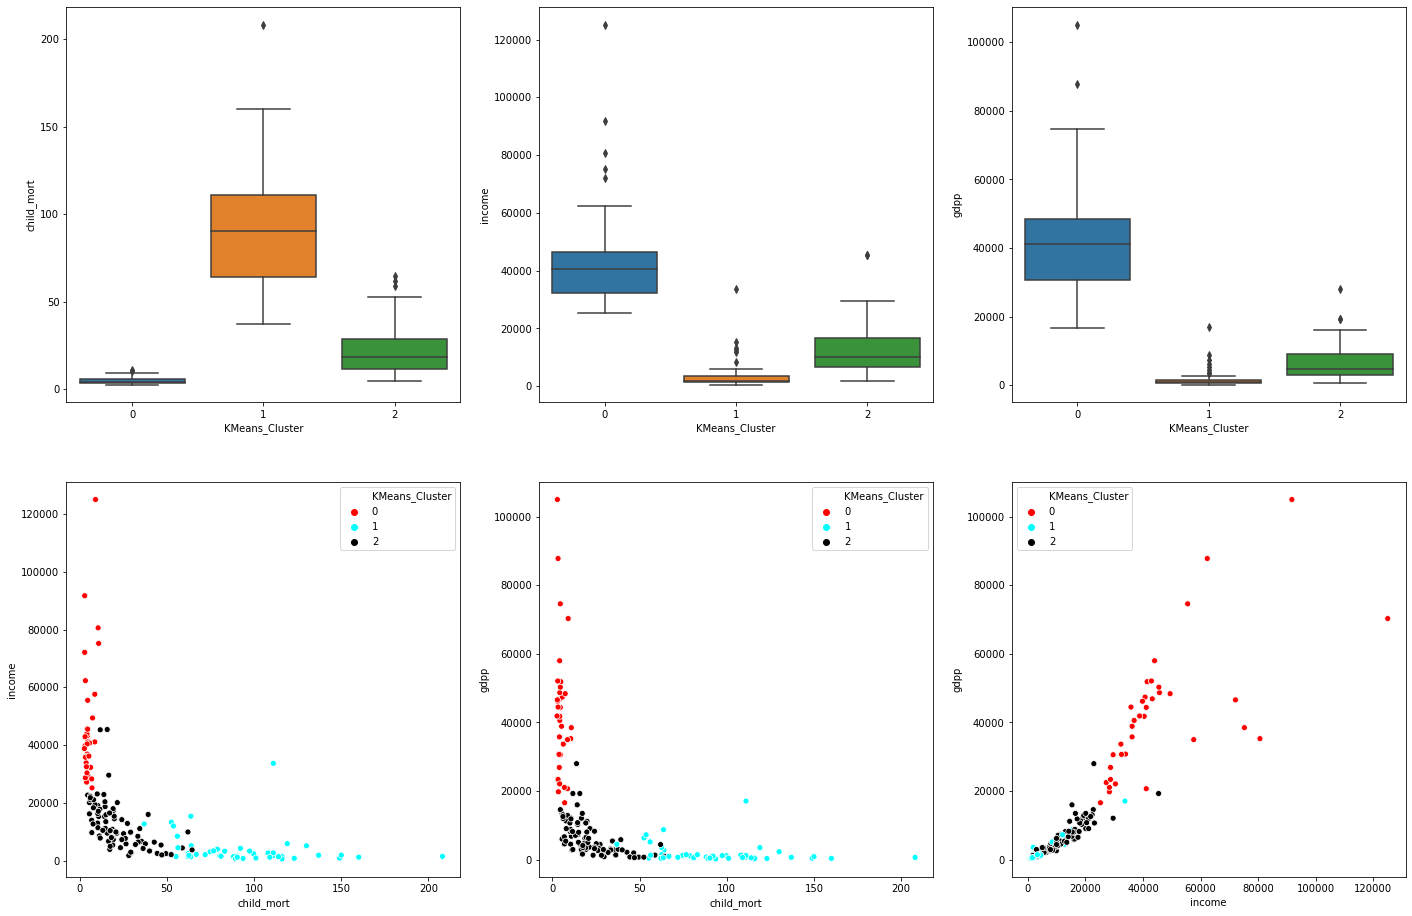

In [67]:
#Visualizing the clusters using boxplots to derive inferences.
plt.figure(figsize=(24,16))
plt.subplot(2,3,1)
sns.boxplot(x='KMeans_Cluster', y='child_mort', data=ngo)
plt.subplot(2,3,2)
sns.boxplot(x='KMeans_Cluster', y='income', data=ngo)
plt.subplot(2,3,3)
sns.boxplot(x='KMeans_Cluster', y='gdpp', data=ngo)
plt.subplot(2,3,4)
sns.scatterplot(x=ngo['child_mort'], y=ngo['income'], hue=ngo['KMeans_Cluster'], palette=['red', 'cyan', 'black'], legend='full')
plt.subplot(2,3,5)
sns.scatterplot(x=ngo['child_mort'], y=ngo['gdpp'], hue=ngo['KMeans_Cluster'], legend='full', palette=['red', 'cyan', 'black'])
plt.subplot(2,3,6)
sns.scatterplot(x=ngo['income'], y=ngo['gdpp'], hue=ngo['KMeans_Cluster'], legend='full', palette=['red', 'cyan', 'black'])
plt.show()

Cluster 0: Very low on Child mortality rate, Best on income, Best on gdpp.

Cluster 1: High on child mortality rate, lowest on income, lowest on gdpp.

Cluster 2: Moderate on Child mortality rate, Moderate on income, Moderate on gdpp.

- None of the countries in cluster 0 requires funding. They are the best performing nations. 
- `Countries in cluster 1 are in trouble in all terms and are in dire need of funds.`
- Few countries in Cluster 2 might also be in a bad state and might need help. Further analysis will be required.

`There is efficient clustering when visualizing them in terms of income-child mortality and gdpp-child mortality. The clusters somewhat overlap when gdpp-income is considered which can be slightly evident from the box-plots as well`

In [41]:
#best performing countries

ngo[ngo.KMeans_Cluster==0].sort_values(['child_mort', 'income', 'gdpp'], ascending=[True, False, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,0
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,0
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,0
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,0
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500,0
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0


In [42]:
#Sorting the cluster 1 based on child mortality rate, income and gdpp.
ngo[ngo.KMeans_Cluster==1].sort_values(['child_mort', 'income', 'gdpp'], ascending=[False, True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,1
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1


In [43]:
#Sorting the cluster 1 based on income and gdpp to see the change in the countries if child mortality is not considered.
ngo[ngo.KMeans_Cluster==1].sort_values(['income', 'gdpp'], ascending=[True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,1
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1


In [44]:
#Sorting the cluster 2 based on child mortality rate, income and gdpp to compare the values with that in cluster 1.

ngo[ngo.KMeans_Cluster==2].sort_values(['child_mort', 'income', 'gdpp'], ascending=[False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,2
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440,2
69,India,58.8,22.600,4.05,27.1000,4410,8.98,66.2,2.60,1350,2
146,Tajikistan,52.4,14.900,5.98,58.6000,2110,12.50,69.6,3.51,738,2
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.14,70.4,2.33,758,2


In [45]:
#Sorting the cluster 2 based on income and gdpp to compare the values with that in cluster 1.

ngo[ngo.KMeans_Cluster==2].sort_values(['income', 'gdpp'], ascending=[True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster
136,Solomon Islands,28.1,49.30,8.55,81.2,1780,6.81,61.7,4.24,1290,2
109,Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,592,2
146,Tajikistan,52.4,14.90,5.98,58.6,2110,12.50,69.6,3.51,738,2
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.14,70.4,2.33,758,2
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.12,66.1,2.88,786,2


### `Insights: `
The best performing countries based on child mortality rate, income and gdpp are
- Iceland
- Luxembourg
- Singapore
- Sweden
- Finland etc.

#### `The countries in dire need of funding are:`
1. Congo, Dem. Rep. : Because of its lowest income, gdpp and relatively high child mortality rate.
2. Central African Republic: Because of its low income, gdpp and relatively higher child mortality rate.
3. Burundi: Low income, gdpp and high child mortality.
4. Liberia: Low income, gdpp and high child mortality.
5. Niger: Low income, gdpp and relatively high child mortality.
6. Haiti: Highest child mortality, low income and gdpp.
7. Sierra Leone: Very high child mortality, low income and gdpp.

<font color='brown'> *Also: Liberia, The Central African Republic, Burundi, The Democratic Republic of the Congo, Niger form the top 5 poorest countries in the world with the lowest Gross  National Income(GNI Index)* </font>

### `(b) Number of Clusters(k)=4`
### <font color='red'> The clusters are changing dynamically. Please refer presentation. Final conclusions will be given using k=3 </font>

In [46]:
#Creating an object for KMeans and fitting the model
kmeans=KMeans(n_clusters=4, init='k-means++', n_init=20)
kmeans.fit(ngo_model)

#Labels for the model having cluster-ids
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [47]:
#Adding the cluster ids to the dataframe.

ngo['Clusters']=kmeans.labels_
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


In [48]:
#Number of datapoints in every cluster.
ngo.Clusters.value_counts()

0    88
2    46
1    30
3     3
Name: Clusters, dtype: int64

#### `Analyzing the clusters:`

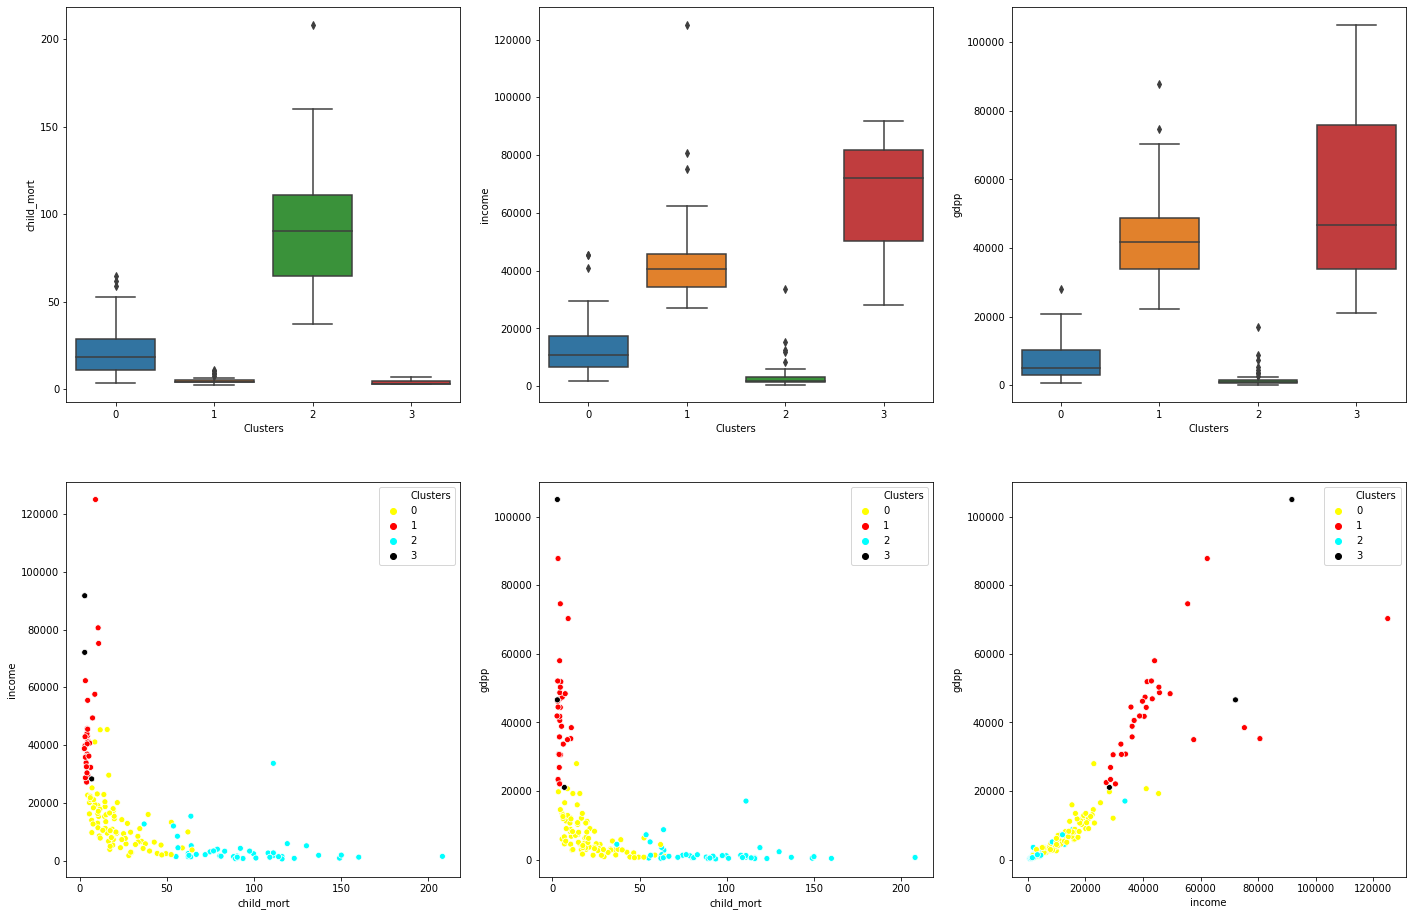

In [70]:
#Visualizing the clusters using boxplots to derive inferences.
plt.figure(figsize=(24,16))
plt.subplot(2,3,1)
sns.boxplot(x='Clusters', y='child_mort', data=ngo)
plt.subplot(2,3,2)
sns.boxplot(x='Clusters', y='income', data=ngo)
plt.subplot(2,3,3)
sns.boxplot(x='Clusters', y='gdpp', data=ngo)
plt.subplot(2,3,4)
sns.scatterplot(x=ngo['child_mort'], y=ngo['income'], hue=ngo['Clusters'], palette=['yellow', 'red', 'cyan', 'black'], legend='full')
plt.subplot(2,3,5)
sns.scatterplot(x=ngo['child_mort'], y=ngo['gdpp'], hue=ngo['Clusters'], legend='full', palette=['yellow', 'red', 'cyan', 'black'])
plt.subplot(2,3,6)
sns.scatterplot(x=ngo['income'], y=ngo['gdpp'], hue=ngo['Clusters'], legend='full', palette=['yellow', 'red', 'cyan', 'black'])
plt.show()
plt.show()

Cluster 2: Maximum on Child mortality rate, lowest on income, lowest on gdpp.

Cluster 1: Low child mortality rate, moderate income, moderate gdpp.

Cluster 0: Moderate on Child mortality rate, low on income, low on gdpp.

Cluster 3: Lowest on child mortality rate, maximum on income, maximum on gdpp.

- None of the countries in cluster 3 and 1 requires funding. They are the best and moderately performing nations respectively.
- Many countries in cluster 2 are in trouble in every terms. 
- Very few countries in Cluster 0 might also be in a bad state and might need help. Further analysis will be required.

`There is efficient clustering when visualizing them in terms of income-child mortality and gdpp-child mortality. The datapoints in cluster 3 is spreadout when considering gdpp and income.`

In [50]:
# Filtering out the most developed nations that requires no funding. Best performing countries:
ngo[ngo.Clusters==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,0,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,0,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,0,3


#### Luxembourg, Malta and Singapore are the best performing countries as far as child mortality rate, income and gdpp is concerned.

In [51]:
#Sorting the cluster 2 based on child mortality rate, income and gdpp.
ngo[ngo.Clusters==2].sort_values(['child_mort', 'income', 'gdpp'], ascending=[False, True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,2
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1,2
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,2
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1,2
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,1,2
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,2
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1,2


In [52]:
#Sorting the cluster 2 based on income and gdpp to see the change in the countries if child mortality is not considered.
ngo[ngo.Clusters==2].sort_values(['income', 'gdpp'], ascending=[True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,2
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,2
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1,2
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1,2
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1,2
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,1,2
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1,2
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,2


In [53]:
#Sorting the cluster 0 based on child mortality rate, income and gdpp to compare the values with that in cluster 0.

ngo[ngo.Clusters==0].sort_values(['child_mort', 'income', 'gdpp'], ascending=[False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,2,0
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440,2,0
69,India,58.8,22.600,4.05,27.1000,4410,8.98,66.2,2.60,1350,2,0
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.92,57.1,2.88,6350,1,0
146,Tajikistan,52.4,14.900,5.98,58.6000,2110,12.50,69.6,3.51,738,2,0


In [54]:
#Sorting the cluster 0 based on income and gdpp to compare the values with that in cluster 0.

ngo[ngo.Clusters==0].sort_values(['income', 'gdpp'], ascending=[True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters
136,Solomon Islands,28.1,49.30,8.55,81.2,1780,6.81,61.7,4.24,1290,2,0
109,Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,592,2,0
146,Tajikistan,52.4,14.90,5.98,58.6,2110,12.50,69.6,3.51,738,2,0
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.14,70.4,2.33,758,2,0
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.12,66.1,2.88,786,2,0


### `Insights:` 
The best performing countries based on child mortality rate, income and gdpp in cluster 3 are
- Luxembourg
- Malta
- Singapore

#### `The countries in dire need of funding are:`
1. Congo, Dem. Rep. : Because of its lowest income, gdpp and relatively high child mortality rate.
2. Central African Republic: Because of its low income, gdpp and relatively higher child mortality rate.
3. Burundi: Low income, gdpp and high child mortality.
4. Liberia: Low income, gdpp and high child mortality.
5. Niger: Low income, gdpp and relatively high child mortality.
6. Haiti: Highest child mortality, low income and gdpp.
7. Sierra Leone: Very high child mortality, low income and gdpp.

<font color='brown'> *Also: Liberia, The Central African Republic, Burundi, The Democratic Republic of the Congo, Niger form the top 5 poorest countries in the world with the lowest Gross  National Income(GNI Index)* </font>

### `4.2 Hierarchical Modelling`

In [55]:
#Scaled dataframe with dropped country column.
ngo_model.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### `4.2.1 Hierarchical Clustering using Single Linkage.`

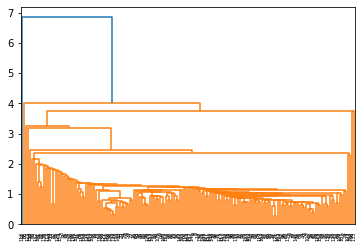

In [56]:
# Developing the linkages with Single linkage and making the dendogram

mergings=linkage(ngo_model, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

In [57]:
# Cutting the dendogram to split the datapoints into 3 clusters.
hier_cluster=cut_tree(mergings, n_clusters=3).reshape(-1,)
hier_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

As shown, hierarchial clustering using single linkage is serving no purpose to the data. All the data points are assigned to cluster 0 except 2 datapoints which are divided into cluster 1 and cluster 2 respectively.

In [58]:
# Assigning cluster ids of hierarchical clustering using Single Linkage to the dataframe.
ngo['Single_hier Cluster']=hier_cluster
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Single_hier Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0


In [59]:
# Filtering the country falling in Clusterid: 1
ngo[ngo['Single_hier Cluster']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Single_hier Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000,0,3,1


In [60]:
# Filtering the country falling in Clusterid: 2
ngo[ngo['Single_hier Cluster']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Single_hier Cluster
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,1,2,2


#### The only 2 countries seperated from the data-points in the entire space are Luxembourg and Nigeria.

<font color='brown'>*_Hence discarding the result developed by Hierarchial clustering using Single Linkage._*</font>

In [61]:
#Dropping the column 'Single_hier Cluster' from the dataframe.
ngo=ngo.drop('Single_hier Cluster', axis=1)
ngo.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0


### `4.2.2 Hierarchical Clustering using Complete Linkage.`

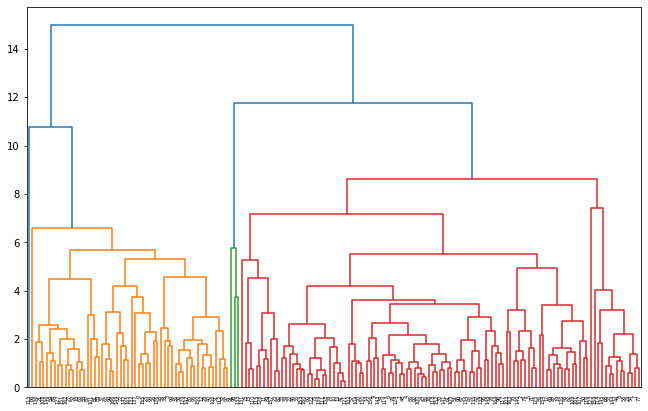

In [62]:
# Developing the linkages with Complete linkage and making the dendogram
mergings=linkage(ngo_model, method='complete', metric='euclidean')
plt.figure(figsize=(11,7))
dendrogram(mergings)
plt.show()

### `(a) Hierarchical clustering with 3 clusters.`

In [63]:
# Cutting the dendogram to split the datapoints into 3 clusters.
hier_cluster=cut_tree(mergings, n_clusters=3).reshape(-1,)
hier_cluster

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [64]:
# Assigning cluster ids of hierarchical clustering using complete Linkage to the dataframe.
ngo['Hier_Complete_Link_Cluster']=hier_cluster
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Hier_Complete_Link_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,1


In [65]:
#Finding the count of datapoints falling under each cluster.
ngo.Hier_Complete_Link_Cluster.value_counts()

1    109
0     55
2      3
Name: Hier_Complete_Link_Cluster, dtype: int64

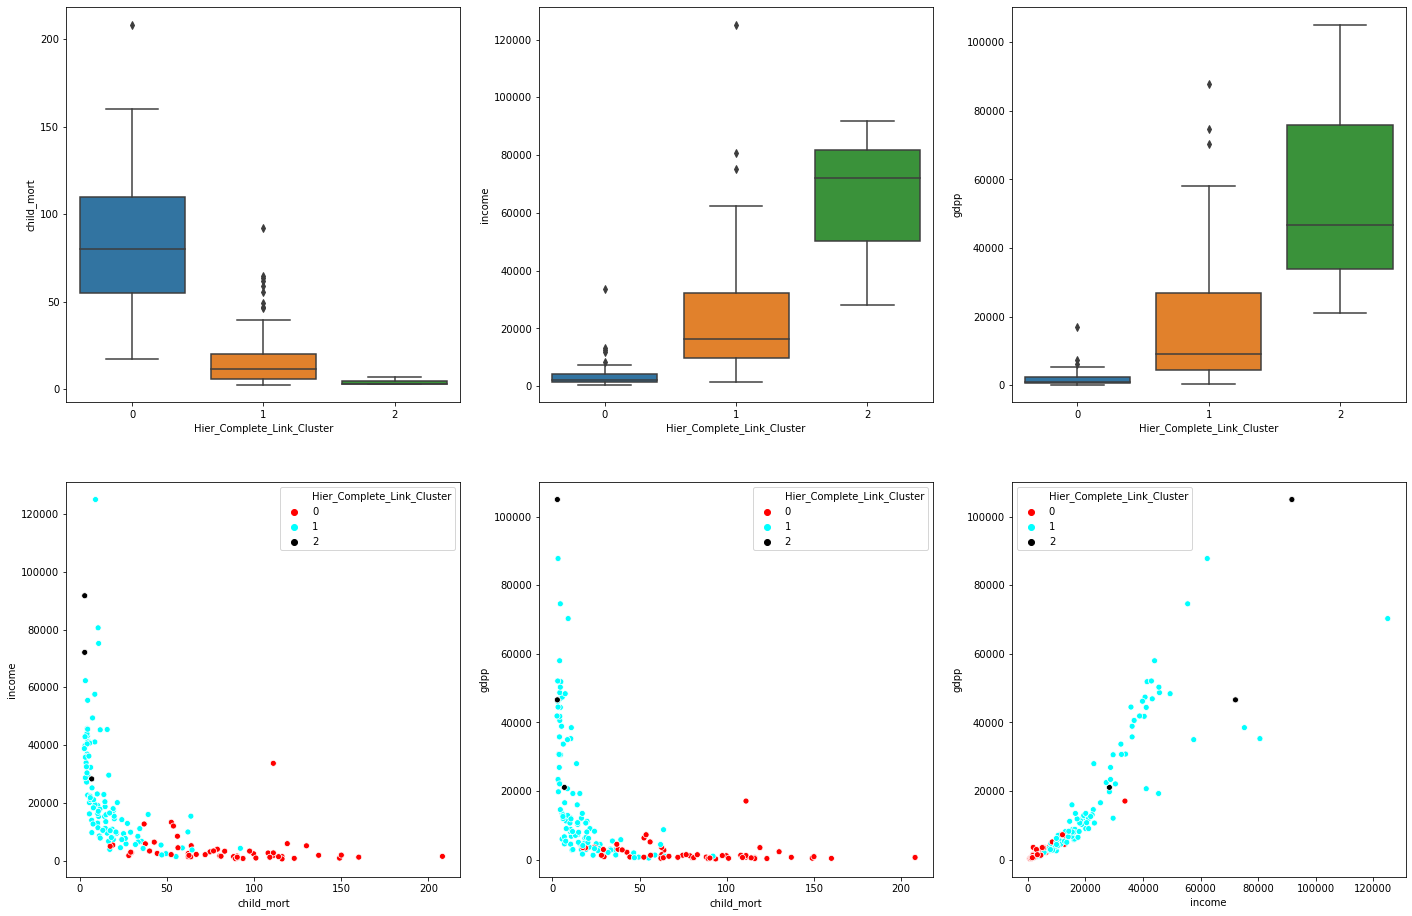

In [71]:
#Visualizing the clusters using boxplots to derive inferences.
plt.figure(figsize=(24,16))
plt.subplot(2,3,1)
sns.boxplot(x='Hier_Complete_Link_Cluster', y='child_mort', data=ngo)
plt.subplot(2,3,2)
sns.boxplot(x='Hier_Complete_Link_Cluster', y='income', data=ngo)
plt.subplot(2,3,3)
sns.boxplot(x='Hier_Complete_Link_Cluster', y='gdpp', data=ngo)
plt.subplot(2,3,4)
sns.scatterplot(x=ngo['child_mort'], y=ngo['income'], hue=ngo['Hier_Complete_Link_Cluster'], palette=['red', 'cyan', 'black'], legend='full')
plt.subplot(2,3,5)
sns.scatterplot(x=ngo['child_mort'], y=ngo['gdpp'], hue=ngo['Hier_Complete_Link_Cluster'], legend='full', palette=['red', 'cyan', 'black'])
plt.subplot(2,3,6)
sns.scatterplot(x=ngo['income'], y=ngo['gdpp'], hue=ngo['Hier_Complete_Link_Cluster'], legend='full', palette=['red', 'cyan', 'black'])
plt.show()

Cluster 0: Highest on child mortality rate, lowest on income, lowest on gdpp.

Cluster 1: Moderate on Child mortality rate, Moderate on income, Moderate on gdpp.
    
Cluster 2: Very low on Child mortality rate, Best on income, Best on gdpp.

- None of the countries in cluster 2 requires funding. They are the best performing nations. 
- Many countries in cluster 0 are in trouble in every terms. 
- Some countries in Cluster 1 might also be in a bad state and might need help. Further analysis will be required.

`There is efficient clustering when visualizing them in terms of income-child mortality, gdpp-child mortality and gdpp-income. But the The datapoints in cluster 2 is spreadout.`

In [72]:
# Filtering the cluster 2 from our dataframe derived using Hierarchical clustering. 
ngo[ngo.Hier_Complete_Link_Cluster==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Hier_Complete_Link_Cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,0,3,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,0,3,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,0,3,2


#### Luxembourg, Malta and Singapore are the best performing countries as far as child mortality rate, income and gdpp is concerned.

In [73]:
#Sorting the cluster 0 based on child mortality rate, income and gdpp.
ngo[ngo.Hier_Complete_Link_Cluster==0].sort_values(['child_mort', 'income', 'gdpp'], ascending=[False, True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Hier_Complete_Link_Cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,2,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,2,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1,2,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,2,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1,2,0
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,1,2,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,1,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1,2,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,1,2,0


In [74]:
#Sorting the cluster 0 based on income and gdpp to see the change in the countries if child mortality is not considered.
ngo[ngo.Hier_Complete_Link_Cluster==0].sort_values(['income', 'gdpp'], ascending=[True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Hier_Complete_Link_Cluster
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,2,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,2,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,2,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,2,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1,2,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1,2,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1,2,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,1,2,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,1,2,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1,2,0


In [75]:
#Sorting the cluster 1 based on child mortality rate, income and gdpp to compare the values with that in cluster 0.

ngo[ngo.Clusters==1].sort_values(['child_mort', 'income', 'gdpp'], ascending=[False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Hier_Complete_Link_Cluster
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.20,78.2,2.21,38500,0,1,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300,0,1,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300,0,1,1
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.50,76.5,1.87,35000,0,1,1
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400,0,1,1


In [76]:
#Sorting the cluster 1 based on income and gdpp to compare the values with that in cluster 0.

ngo[ngo.Clusters==1].sort_values(['income', 'gdpp'], ascending=[True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Hier_Complete_Link_Cluster
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,0,1,1
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400,0,1,1
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,0,1,1
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600,0,1,1
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100,0,1,1


### `Insights: `
The best performing countries based on child mortality rate, income and gdpp in cluster 2 are
- Luxembourg
- Malta
- Singapore

#### `The countries in dire need of funding are:`
1. Congo, Dem. Rep. : Because of its lowest income, gdpp and relatively high child mortality rate.
2. Central African Republic: Because of its low income, gdpp and relatively higher child mortality rate.
3. Burundi: Low income, gdpp and high child mortality.
4. Liberia: Low income, gdpp and high child mortality.
5. Niger: Low income, gdpp and relatively high child mortality.
6. Haiti: Highest child mortality, low income and gdpp.
7. Sierra Leone: Very high child mortality, low income and gdpp.

<font color='brown'> *Also: Liberia, The Central African Republic, Burundi, The Democratic Republic of the Congo, Niger form the top 5 poorest countries in the world with the lowest Gross  National Income(GNI Index)* </font>

### `(b) Hierarchical clustering with 4 clusters.`

In [77]:
# Cutting the dendogram to split the datapoints into 4 clusters.
hier_cluster=cut_tree(mergings, n_clusters=4).reshape(-1,)
hier_cluster

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [78]:
# Assigning cluster ids of hierarchical clustering using complete Linkage to the dataframe.
ngo['Hier_Complete_Link_Cluster=4']=hier_cluster
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Hier_Complete_Link_Cluster,Hier_Complete_Link_Cluster=4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,1,1


In [79]:
#Finding the count of datapoints falling under each cluster.
ngo['Hier_Complete_Link_Cluster=4'].value_counts()

1    109
0     54
2      3
3      1
Name: Hier_Complete_Link_Cluster=4, dtype: int64

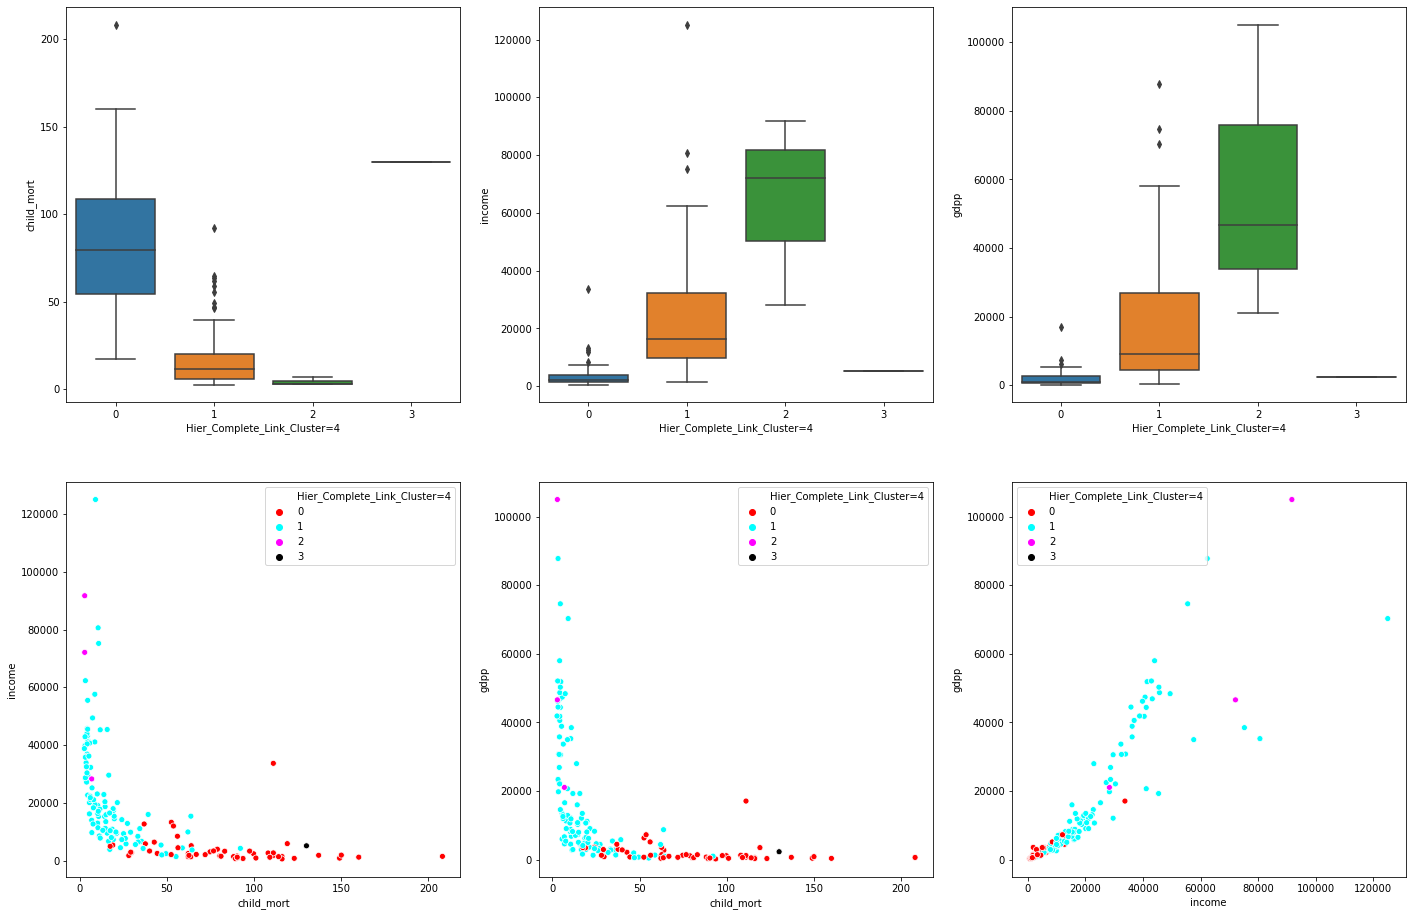

In [80]:
#Visualizing the clusters using boxplots to derive inferences.
plt.figure(figsize=(24,16))
plt.subplot(2,3,1)
sns.boxplot(x='Hier_Complete_Link_Cluster=4', y='child_mort', data=ngo)
plt.subplot(2,3,2)
sns.boxplot(x='Hier_Complete_Link_Cluster=4', y='income', data=ngo)
plt.subplot(2,3,3)
sns.boxplot(x='Hier_Complete_Link_Cluster=4', y='gdpp', data=ngo)
plt.subplot(2,3,4)
sns.scatterplot(x=ngo['child_mort'], y=ngo['income'], hue=ngo['Hier_Complete_Link_Cluster=4'], palette=['red', 'cyan', 'magenta', 'black'], legend='full')
plt.subplot(2,3,5)
sns.scatterplot(x=ngo['child_mort'], y=ngo['gdpp'], hue=ngo['Hier_Complete_Link_Cluster=4'], legend='full', palette=['red', 'cyan', 'magenta', 'black'])
plt.subplot(2,3,6)
sns.scatterplot(x=ngo['income'], y=ngo['gdpp'], hue=ngo['Hier_Complete_Link_Cluster=4'], legend='full', palette=['red', 'cyan', 'magenta', 'black'])
plt.show()

Cluster 0: Highest on child mortality rate, lowest on income, lowest on gdpp.

Cluster 1: Moderate on Child mortality rate, Moderate on income, Moderate on gdpp.
    
Cluster 2: Very low on Child mortality rate, Best on income, Best on gdpp.

Cluster 3: Very high on child mortality rate, very low on income, very low on gdpp. This cluster is very similar to cluster 0 and is making no sense to us as far as child mortality, income and gdpp are concerned.

- None of the countries in cluster 2 requires funding. They are the best performing nations. 
- Many countries in cluster 0 and the only country in cluster 3 are in trouble in every terms. 
- Some countries in Cluster 1 might also be in a bad state and might need help. Further analysis will be required.

#### Hierarchical clustering with 4 clusters is serving no additional purpose to us. Hence dropping the column from our dataframe which has clustering resulting from hierarchical clustering having 4 clusters

In [81]:
#dropping the column from our dataframe which has clustering resulting from hierarchical clustering having 4 clusters
ngo=ngo.drop('Hier_Complete_Link_Cluster=4', axis=1)

# 5. Conclusion.

#### The final dataframe obtained from the analysis with assigned clusters from KMeans clustering k=3, k=4 and hierarchical clustering with 3 clusters and data can be filtered out of this dataframe for respective clusters described throughout the analysis:

In [82]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Cluster,Clusters,Hier_Complete_Link_Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,1


### `The common countries which seemed to be in dire need are:`
1. Congo, Dem. Rep. : Because of its lowest income, gdpp and relatively high child mortality rate.
2. Central African Republic: Because of its low income, gdpp and relatively higher child mortality rate.
3. Burundi: Low income, gdpp and high child mortality.
4. Liberia: Low income, gdpp and high child mortality.
5. Niger: Low income, gdpp and relatively high child mortality.
6. Haiti: Highest child mortality, low income and gdpp.
7. Sierra Leone: Very high child mortality, low income and gdpp.

<font color='brown'> *Also: Liberia, The Central African Republic, Burundi, The Democratic Republic of the Congo, Niger form the top 5 poorest countries in the world with the lowest Gross  National Income(GNI Index). Hence more money must be alloted to them for overall development and more money should be alloted to Haiti and Sierra Leone for child mortality rate.* </font>